In [140]:
from IPython.display import display, Math
from sympy import Symbol
from sympy.plotting import plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def CubicSpline(n, x, fx, case_num):
    c = [0] * (n + 1)
    z = [0] * (n + 1)
    u = [0] * (n + 1)
    h = [0] * (n + 1)
    A = [0] * (n + 1)
    b = [0] * (n + 1)
    d = [0] * (n + 1)
    l = [1] * (n + 1)
    
    # find ai
    a = fx
    
    for i in range(1, n + 1):
        h[i - 1] = x[i] - x[i - 1]
        
        
    for i in range(1, n):
        A[i] = (3 * (fx[i + 1] - fx[i]) / h[i]) - (3 * (fx[i] - fx[i - 1]) / h[i - 1])
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (A[i] - h[i - 1] * z[i - 1]) / l[i]
        
    for i in range(0, n):
        j = n - i - 1
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (fx[j + 1] - fx[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        
    # the coefficients of the natural cubic spline S(x), ai , bi , ci , di
    table = pd.DataFrame({
        '$x_{j}$': x[:-1],
        '$a_{j}$': fx[:-1],
        '$b_{j}$': b[:-1],
        '$c_{j}$': c[:-1],
        '$d_{j}$': d[:-1]
    })
    display(table)
    
    for i in range(0, n):
        t = np.arange(x[i], x[i + 1], 0.0001)
        function = a[i] + b[i] * (t - x[i]) + c[i] * (t - x[i]) ** 2 + d[i] * (t - x[i]) ** 3
        plt.plot(t, function)
    plt.show()

## 1. Table 3.14

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,1.30,0.539624,0.000000,-0.247649,0.9
1,1.50,0.420752,-0.297179,0.946912,1.3
2,1.85,1.086803,1.407263,-2.956382,1.9
3,2.10,1.294942,-0.366567,-0.446635,2.1
4,2.60,0.593399,-1.036519,0.445051,2.6
5,2.70,-0.022191,-0.502457,0.174160,3.0
6,2.40,-0.503406,-0.032226,0.078076,3.9
7,2.15,-0.477075,0.084888,1.314171,4.4
8,2.05,-0.071316,1.267642,-1.581219,4.7
9,2.10,0.262340,-0.155455,0.043115,5.0


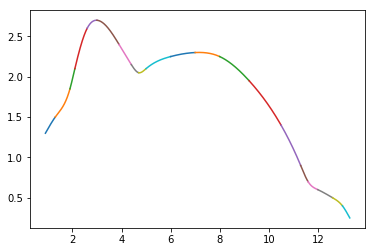

In [143]:
n = 20;
x = [
    0.9, 1.3, 1.9, 2.1, 2.6, 
    3.0, 3.9, 4.4, 4.7, 5.0, 6.0,
    7.0, 8.0, 9.2, 10.5, 11.3, 
    11.6, 12.0, 12.6, 13.0, 13.3
]
fx = [
    1.3, 1.5, 1.85, 2.1, 2.6, 
    2.7, 2.4, 2.15, 2.05, 2.1, 
    2.25, 2.3, 2.25, 1.95, 1.4, 
    0.9, 0.7, 0.6, 0.5, 0.4, 0.25
]
CubicSpline(n, x, fx, 1)

## 2. A  car  traveling  along  a  straight  road  is  clocked  at  a  number  of  points. 

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0,73.887967,0.000000,0.123559,0
1,225,77.224066,1.112033,-0.112033,3
2,383,80.327801,0.439834,-0.183034,5
3,623,78.024896,-1.207469,0.080498,8


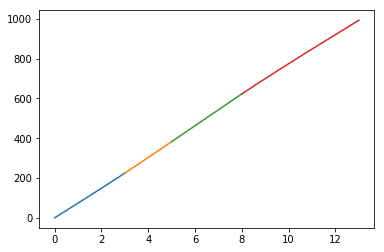

In [142]:
n = 4
x =  [0, 3, 5, 8, 13]
fx = [0, 225, 383, 623, 993]
CubicSpline(n, x, fx, 2)

## 3. The following table details the USA population from 1910 to 1980.

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,91972266,1.210006e+06,0.000000,1638.294140,1910
1,105710620,1.701494e+06,49148.824195,-4865.398699,1920
2,122775046,1.224851e+06,-96813.136780,6327.031657,1930
3,131669275,1.186698e+06,92997.812926,-2138.673928,1940
4,150697361,2.405052e+06,28837.595076,-887.267488,1950
5,203235298,2.493835e+06,-24398.454192,813.281806,1970


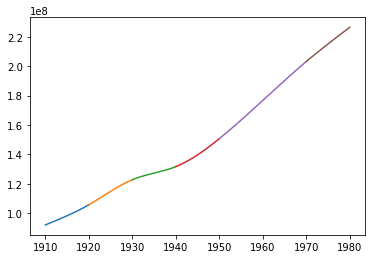

In [145]:
n = 6
x = [1910, 1920, 1930, 1940, 1950, 1970, 1980]
fx = [91972266, 105710620, 122775046, 131669275, 150697361, 203235298, 226547082]
CubicSpline(n, x, fx, 3)

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0.009901,0.008381,0.000000,0.040527,-2.000000e+00
1,0.014196,0.021890,0.040527,-0.107737,-1.666667e+00
2,0.022005,0.012995,-0.067210,0.529003,-1.333333e+00
3,0.038462,0.144523,0.461793,-1.495187,-1.000000e+00
4,0.082569,-0.046011,-1.033394,8.431981,-6.666667e-01
5,0.264706,2.075720,7.398587,-21.024303,-3.333333e-01
6,1.000000,0.000011,-13.625716,21.024109,-3.330669e-16
7,0.264706,-2.075763,7.398394,-8.431012,3.333333e-01
8,0.082569,0.046162,-1.032618,1.491502,6.666667e-01
9,0.038462,-0.145083,0.458884,-0.515236,1.000000e+00


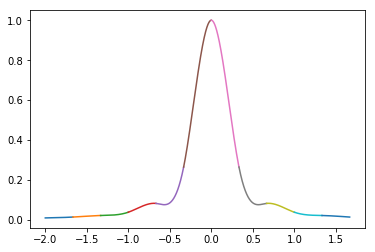

In [149]:
n = 11
j = -2
x = [0] * (n + 1)
fx = [0] * (n + 1)
for i in range(0, n + 1):
    x[i] = j
    fx[i] = 1 / (1 + 25 * j * j)
    j += 4 / (n + 1)
    
CubicSpline(n, x, fx, 4)

## 5. Repeat case 4 with more number of nodes. Thus, try a larger value of n.

,$a_{j}$,$b_{j}$,$c_{j}$,$d_{j}$,$x_{j}$
0,0.009901,0.009836,0.000000,0.388093,-2.000
1,0.009980,0.009911,0.009314,-0.097803,-1.992
2,0.010060,0.010041,0.006967,0.032516,-1.984
3,0.010141,0.010159,0.007747,-0.002277,-1.976
4,0.010222,0.010282,0.007693,0.007175,-1.968
5,0.010305,0.010407,0.007865,0.004775,-1.960
6,0.010389,0.010534,0.007979,0.005554,-1.952
7,0.010474,0.010662,0.008113,0.005484,-1.944
8,0.010559,0.010793,0.008244,0.005645,-1.936
9,0.010646,0.010926,0.008380,0.005748,-1.928


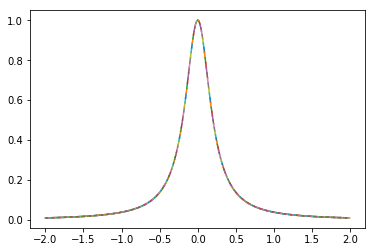

In [150]:
n = 499
j = -2
x = [0] * (n + 1)
fx = [0] * (n + 1)
for i in range(0, n + 1):
    x[i] = j
    fx[i] = 1 / (1 + 25 * j * j)
    j += 4 / (n + 1)
    
CubicSpline(n, x, fx, 4)

## 6. Use the following data to construct a pair of natural cubic splines S x (t) and S y (t).

## 7. Use the following data to construct a pair of natural cubic splines S x (t) and S y (t).

## 8. A unit circle can be represented by the following parametric form:

## 9. Repeat case 8 with more number of nodes. Thus, try a larger value of n.